# Chapter 7: Version Control Software

This notebook is part of the 'Data Science with Python Handbook' by [Alireza Samar](http://alirezasamar.com), read the other chapters at [https://git.io/datascihandbook](https://git.io/datascihandbook).

In [13]:
from IPython.display import Image

"A component of software configuration management, version control, also known as revision control or source control, is the management of changes to documents, computer programs, large web sites, and other collections of information."

## Main purposes of Version Control Software:

1. Keep track of changes in the source code.
    * Allow reverting back to an older revision if something goes wrong.
    * Work on several "branches" of the software concurrently.
    * Tags revisions to keep track of which version of the software that was used for what (for example, "release-1.0", "paper-A-final", ...)
2. Make it possible for serveral people to collaboratively work on the same code base simultaneously.
    * Allow many authors to make changes to the code.
    * Clearly communicating and visualizing changes in the code base to everyone involved.

## Basic principles and terminology

In an RCS, the source code or digital content is stored in a **repository**. 

* The repository does not only contain the latest version of all files, but the complete history of all changes to the files since they were added to the repository. 

* A user can **checkout** the repository, and obtain a local working copy of the files. All changes are made to the files in the local working directory, where files can be added, removed and updated. 

* When a task has been completed, the changes to the local files are **commited** (saved to the repository).

* If someone else has been making changes to the same files, a **conflict** can occur. In many cases conflicts can be **resolved** automatically by the system, but in some cases we might manually have to **merge** different changes together.

* It is often useful to create a new **branch** in a repository, or a **fork** or **clone** of an entire repository, when we doing larger experimental development. The main branch in a repository is called often **master** or **trunk**. When work on a branch or fork is completed, it can be merged in to the master branch/repository.

* With distributed RCSs such as GIT or Mercurial, we can **pull** and **push** changesets between different repositories. For example, between a local copy of there repository to a central online reposistory (for example on a community repository host site like github.com).

### Examples of Version Control Software

1. GIT (`git`) : http://git-scm.com/
2. Mercurial (`hg`) : http://mercurial.selenic.com/

In the rest of this lecture we will look at `git`, although `hg` is just as good and work in almost exactly the same way.

## Installing git

On Linux:
    
    $ sudo apt-get install git

On Mac (with macports):

    $ sudo port install git

The first time you start to use git, you'll need to configure your author information:

    $ git config --global user.name 'Robert Johansson'
    $ git config --global user.email robert@riken.jp

## Creating and cloning a repository

To create a brand new empty repository, we can use the command `git init repository-name`:

In [4]:
# create a new git repository called gitdemo:
!git init gitdemo

Reinitialized existing Git repository in /home/rob/Desktop/scientific-python-lectures/gitdemo/.git/


If we want to fork or clone an existing repository, we can use the command `git clone repository`:

In [5]:
!git clone https://github.com/qutip/qutip

Cloning into 'qutip'...
remote: Counting objects: 7425, done.
remote: Compressing objects: 100% (2013/2013), done.
remote: Total 7425 (delta 5386), reused 7420 (delta 5381)
Receiving objects: 100% (7425/7425), 2.25 MiB | 696 KiB/s, done.
Resolving deltas: 100% (5386/5386), done.


Git clone can take a URL to a public repository, like above, or a path to a local directory:

In [6]:
!git clone gitdemo gitdemo2

Cloning into 'gitdemo2'...
done.


We can also clone private repositories over secure protocols such as SSH:

    $ git clone ssh://myserver.com/myrepository

## Status

Using the command `git status` we get a summary of the current status of the working directory. It shows if we have modified, added or removed files.

In [34]:
!git status

# On branch master
#
# Initial commit
#
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	Lecture-7-Revision-Control-Software.ipynb
nothing added to commit but untracked files present (use "git add" to track)


In this case, only the current ipython notebook has been added. It is listed as an untracked file, and is therefore not in the repository yet.

## Adding files and committing changes

To add a new file to the repository, we first create the file and then use the `git add filename` command:

In [35]:
%%file README

A file with information about the gitdemo repository.

Writing README


In [36]:
!git status

# On branch master
#
# Initial commit
#
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	Lecture-7-Revision-Control-Software.ipynb
#	README
nothing added to commit but untracked files present (use "git add" to track)


After having added the file `README`, the command `git status` list it as an *untracked* file.

In [37]:
!git add README

In [1]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Chapter-3-Numpy.ipynb
	Chapter-5-Matplotlib.ipynb
	Lecture-7-Version-Control-Software.ipynb

nothing added to commit but untracked files present (use "git add" to track)


Now that it has been added, it is listed as a *new file* that has not yet been commited to the repository.

In [39]:
!git commit -m "Add README file" README

[master (root-commit) 1f26ad6] Added a README file
 1 file changed, 2 insertions(+)
 create mode 100644 README


In [40]:
!git add Lecture-7-Version-Control-Software.ipynb

In [41]:
!git commit -m "Add Chapter 7" Lecture-7-Version-Control-Software.ipynb

[master da8b6e9] added notebook file
 1 file changed, 2047 insertions(+)
 create mode 100644 Lecture-7-Revision-Control-Software.ipynb


In [42]:
!git status 

# On branch master
nothing to commit (working directory clean)


After *committing* the change to the repository from the local working directory, `git status` again reports that working directory is clean.

## Commiting changes

When files that is tracked by GIT are changed, they are listed as *modified* by `git status`:

In [43]:
%%file README

A file with information about the gitdemo repository.

A new line.

Overwriting README


In [44]:
!git status

# On branch master
# Changes not staged for commit:
#   (use "git add <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   README
#
no changes added to commit (use "git add" and/or "git commit -a")


Again, we can commit such changes to the repository using the `git commit -m "message"` command.

In [45]:
!git commit -m "added one more line in README" README

[master b6db712] added one more line in README
 1 file changed, 3 insertions(+), 1 deletion(-)


In [46]:
!git status

# On branch master
nothing to commit (working directory clean)


## Removing files

To remove file that has been added to the repository, use `git rm filename`, which works similar to `git add filename`:

In [47]:
%%file tmpfile

A short-lived file.

Writing tmpfile


Add it:

In [48]:
!git add tmpfile

In [49]:
!git commit -m "adding file tmpfile" tmpfile 

[master 44ed840] adding file tmpfile
 1 file changed, 2 insertions(+)
 create mode 100644 tmpfile


Remove it again:

In [51]:
!git rm tmpfile

rm 'tmpfile'


In [52]:
!git commit -m "remove file tmpfile" tmpfile 

[master a9dc0a4] remove file tmpfile
 1 file changed, 2 deletions(-)
 delete mode 100644 tmpfile


## Commit logs

The messages that are added to the commit command are supposed to give a short (often one-line) description of the changes/additions/deletions in the commit. If the `-m "message"` is omitted when invoking the `git commit` message an editor will be opened for you to type a commit message (for example useful when a longer commit message is requried). 

We can look at the revision log by using the command `git log`:

In [2]:
!git log

commit 86d0f9a51e674e654c9814f008fd4820f5952671
Author: Alireza Samar <alireza.smr@gmail.com>
Date:   Wed Dec 28 01:41:58 2016 +0800

    Update Chapter 2
    
    Initialize assets and examples script

commit c18db5eb2aad1a79bac1a82410db6d93e489e170
Author: Alireza Samar <alireza.smr@gmail.com>
Date:   Wed Dec 28 01:13:54 2016 +0800

    Update README
    
    Fix Command

commit c1d97fc640868d63ef07e87715ac538a4662dd16
Author: Alireza Samar <alireza.smr@gmail.com>
Date:   Wed Dec 28 01:10:51 2016 +0800

    Update README
    
    Available Chapters Indicator

commit 45d852869670d4fe10aeb0277ff3478d749e9a0f
Author: Alireza Samar <alireza.smr@gmail.com>
Date:   Wed Dec 28 01:01:08 2016 +0800

    Update README

commit 03a5f1557fede6216d8d3ad31a969d34a97449f6
Author: Alireza Samar <alireza.smr@gmail.com>
Date:   Wed Dec 28 00:59:03 2016 +0800

    Update README
    
    Initialize the Chapters and Instructions to Setup

commit fb3c1fbd99a58eeeed4da94249f9641c19f89108
Author: Alireza Sam

In the commit log, each revision is shown with a timestampe, a unique has tag that, and author information and the commit message.

## Diffs

All commits results in a changeset, which has a "diff" describing the changes to the file associated with it. We can use `git diff` so see what has changed in a file:

In [54]:
%%file README

A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software (for example).

Overwriting README


In [55]:
!git diff README

diff --git a/README b/README
index 4f51868..d3951c6 100644
--- a/README
+++ b/README
@@ -1,4 +1,4 @@
 
 A file with information about the gitdemo repository.
 
-A new line.
\ No newline at end of file
+README files usually contains installation instructions, and information about how to get started using the software (for example).
\ No newline at end of file


That looks quite cryptic but is a standard form for describing changes in files. We can use other tools, like graphical user interfaces or web based systems to get a more easily understandable diff.

In github (a web-based GIT repository hosting service) it can look like this:

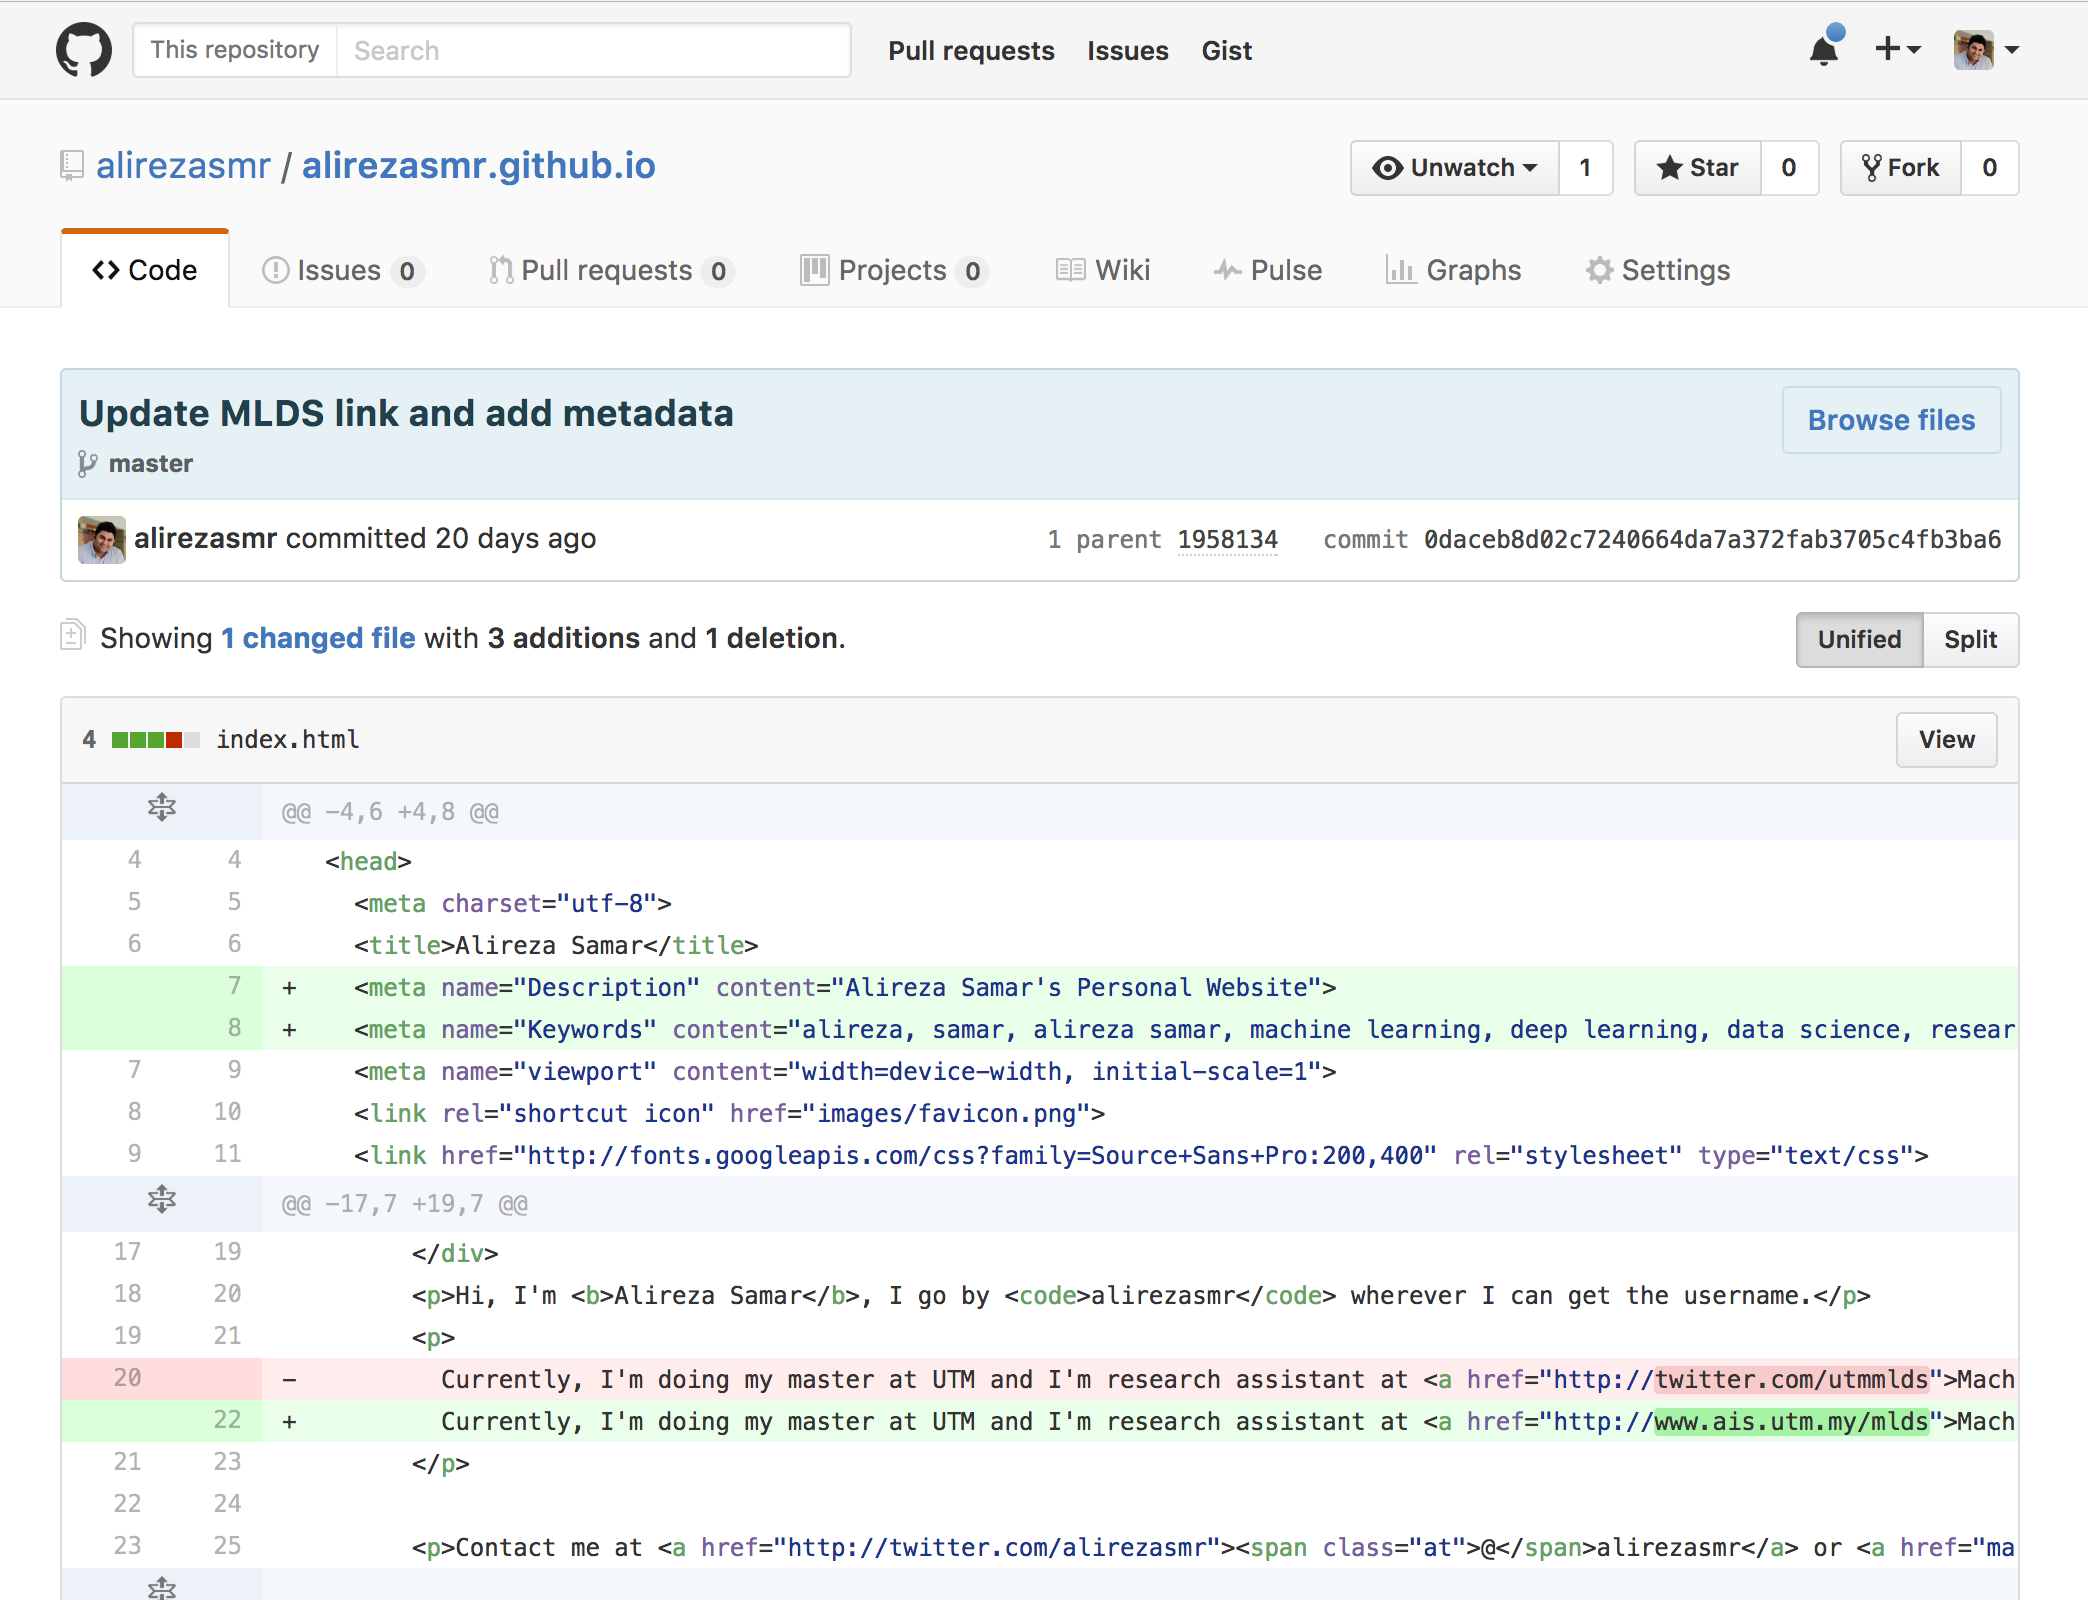

In [25]:
Image(filename='assets/github-diff.png')

## Discard changes in the working directory

To discard a change (revert to the latest version in the repository) we can use the `checkout` command like this:

In [58]:
!git checkout -- README

In [59]:
!git status

# On branch master
nothing to commit (working directory clean)


## Checking out old revisions

If we want to get the code for a specific revision, we can use "git checkout" and giving it the hash code for the revision we are interested as argument:

In [60]:
!git log

commit a9dc0a4b68e8b1b6d973be8f7e7b8f1c92393c17
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:41 2012 +0100

    remove file tmpfile

commit 44ed840422571c62db55eabd8e8768be6c7784e4
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:31 2012 +0100

    adding file tmpfile

commit b6db712506a45a68001c768a6cf6e15e11c62f89
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:26 2012 +0100

    added one more line in README

commit da8b6e92b34fe3838873bdd27a94402ecc121c43
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:20 2012 +0100

    added notebook file

commit 1f26ad648a791e266fbb951ef5c49b8d990e6461
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:19 2012 +0100

    Added a README file


In [61]:
!git checkout 1f26ad648a791e266fbb951ef5c49b8d990e6461

Note: checking out '1f26ad648a791e266fbb951ef5c49b8d990e6461'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b new_branch_name

HEAD is now at 1f26ad6... Added a README file


Now the content of all the files like in the revision with the hash code listed above (first revision)

In [62]:
!cat README


A file with information about the gitdemo repository.

We can move back to "the latest" (master) with the command:

In [63]:
!git checkout master 

Previous HEAD position was 1f26ad6... Added a README file
Switched to branch 'master'


In [64]:
!cat README


A file with information about the gitdemo repository.

A new line.

In [65]:
!git status

# On branch master
nothing to commit (working directory clean)


## Tagging and branching

### Tags

Tags are named revisions. They are useful for marking particular revisions for later references. For example, we can tag our code with the tag "paper-1-final" when when simulations for "paper-1" are finished and the paper submitted. Then we can always retreive the exactly the code used for that paper even if we continue to work on and develop the code for future projects and papers.

In [66]:
!git log

commit a9dc0a4b68e8b1b6d973be8f7e7b8f1c92393c17
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:41 2012 +0100

    remove file tmpfile

commit 44ed840422571c62db55eabd8e8768be6c7784e4
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:31 2012 +0100

    adding file tmpfile

commit b6db712506a45a68001c768a6cf6e15e11c62f89
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:26 2012 +0100

    added one more line in README

commit da8b6e92b34fe3838873bdd27a94402ecc121c43
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:20 2012 +0100

    added notebook file

commit 1f26ad648a791e266fbb951ef5c49b8d990e6461
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:19 2012 +0100

    Added a README file


In [67]:
!git tag -a demotag1 -m "Code used for this and that purpuse" 

In [68]:
!git tag -l 

demotag1


In [69]:
!git show demotag1

tag demotag1
Tagger: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:57:25 2012 +0100

Code used for this and that purpuse

commit a9dc0a4b68e8b1b6d973be8f7e7b8f1c92393c17
Author: Robert Johansson <jrjohansson@gmail.com>
Date:   Mon Dec 10 06:54:41 2012 +0100

    remove file tmpfile

diff --git a/tmpfile b/tmpfile
deleted file mode 100644
index ee4c1e7..0000000
--- a/tmpfile
+++ /dev/null
@@ -1,2 +0,0 @@
-
-A short-lived file.
\ No newline at end of file


To retreive the code in the state corresponding to a particular tag, we can use the `git checkout tagname` command:

    $ git checkout demotag1

## Branches

With branches we can create diverging code bases in the same repository. They are for example useful for experimental development that requires a lot of code changes that could break the functionality in the master branch. Once the development of a branch has reached a stable state it can always be merged back into the trunk. Branching-development-merging is a good development strategy when serveral people are involved in working on the same code base. But even in single author repositories it can often be useful to always keep the master branch in a working state, and always branch/fork before implementing a new feature, and later merge it back into the main trunk.

In GIT, we can create a new branch like this:

In [70]:
!git branch expr1 

We can list the existing branches like this:

In [71]:
!git branch

  expr1
* master


And we can switch between branches using `checkout`:

In [81]:
!git checkout expr1

Switched to branch 'expr1'


Make a change in the new branch.

In [74]:
%%file README

A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software (for example).

Experimental addition.

Overwriting README


In [76]:
!git commit -m "added a line in expr1 branch" README

[expr1 a6dc24f] added a line in expr1 branch
 1 file changed, 3 insertions(+), 1 deletion(-)


In [77]:
!git branch

* expr1
  master


In [78]:
!git checkout master

Switched to branch 'master'


In [79]:
!git branch

  expr1
* master


We can merge an existing branch and all its changesets into another branch (for example the master branch) like this:

First change to the target branch:

In [82]:
!git checkout master

Switched to branch 'master'


In [83]:
!git merge expr1

Updating a9dc0a4..a6dc24f
Fast-forward
 README |    4 +++-
 1 file changed, 3 insertions(+), 1 deletion(-)


In [84]:
!git branch 

  expr1
* master


We can delete the branch `expr1` now that it has been merged into the master:

In [85]:
!git branch -d expr1

Deleted branch expr1 (was a6dc24f).


In [86]:
!git branch

* master


In [88]:
!cat README


A file with information about the gitdemo repository.

README files usually contains installation instructions, and information about how to get started using the software (for example).

Experimental addition.

## pulling and pushing changesets between repositories

If the respository has been cloned from another repository, for example on github.com, it automatically remembers the address of the parant repository (called origin):

In [5]:
!git remote

origin


In [4]:
!git remote show origin

* remote origin
  Fetch URL: git@github.com:jrjohansson/scientific-python-lectures.git
  Push  URL: git@github.com:jrjohansson/scientific-python-lectures.git
  HEAD branch: master
  Remote branch:
    master tracked
  Local branch configured for 'git pull':
    master merges with remote master
  Local ref configured for 'git push':
    master pushes to master (up to date)


### pull

We can retrieve updates from the origin repository by "pulling" changesets from "origin" to our repository:

In [6]:
!git pull origin

Already up-to-date.


We can register addresses to many different repositories, and pull in different changesets from different sources, but the default source is the origin from where the repository was first cloned (and the work origin could have been omitted from the line above).

### push

After making changes to our local repository, we can push changes to a remote repository using `git push`. Again, the default target repository is `origin`, so we can do:

In [7]:
!git status

# On branch master
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	Lecture-7-Revision-Control-Software.ipynb
nothing added to commit but untracked files present (use "git add" to track)


In [8]:
!git add Lecture-7-Version-Control-Software.ipynb

In [9]:
!git commit -m "added lecture notebook about RCS" Lecture-7-Version-Control-Software.ipynb

[master d0d6a70] added lecture notebook about RCS
 1 file changed, 2114 insertions(+)
 create mode 100644 Lecture-7-Revision-Control-Software.ipynb


In [11]:
!git push

Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 118.94 KiB, done.
Total 3 (delta 1), reused 0 (delta 0)
To git@github.com:jrjohansson/scientific-python-lectures.git
   2495af4..d0d6a70  master -> master


## Hosted repositories

Github.com is a git repository hosting site that is very popular with both open source projects (for which it is free) and private repositories (for which a subscription might be needed).

With a hosted repository it easy to collaborate with colleagues on the same code base, and you get a graphical user interface where you can browse the code and look at commit logs, track issues etc. 

Some good hosted repositories are

* Github : http://www.github.com
* Bitbucket: http://www.bitbucket.org

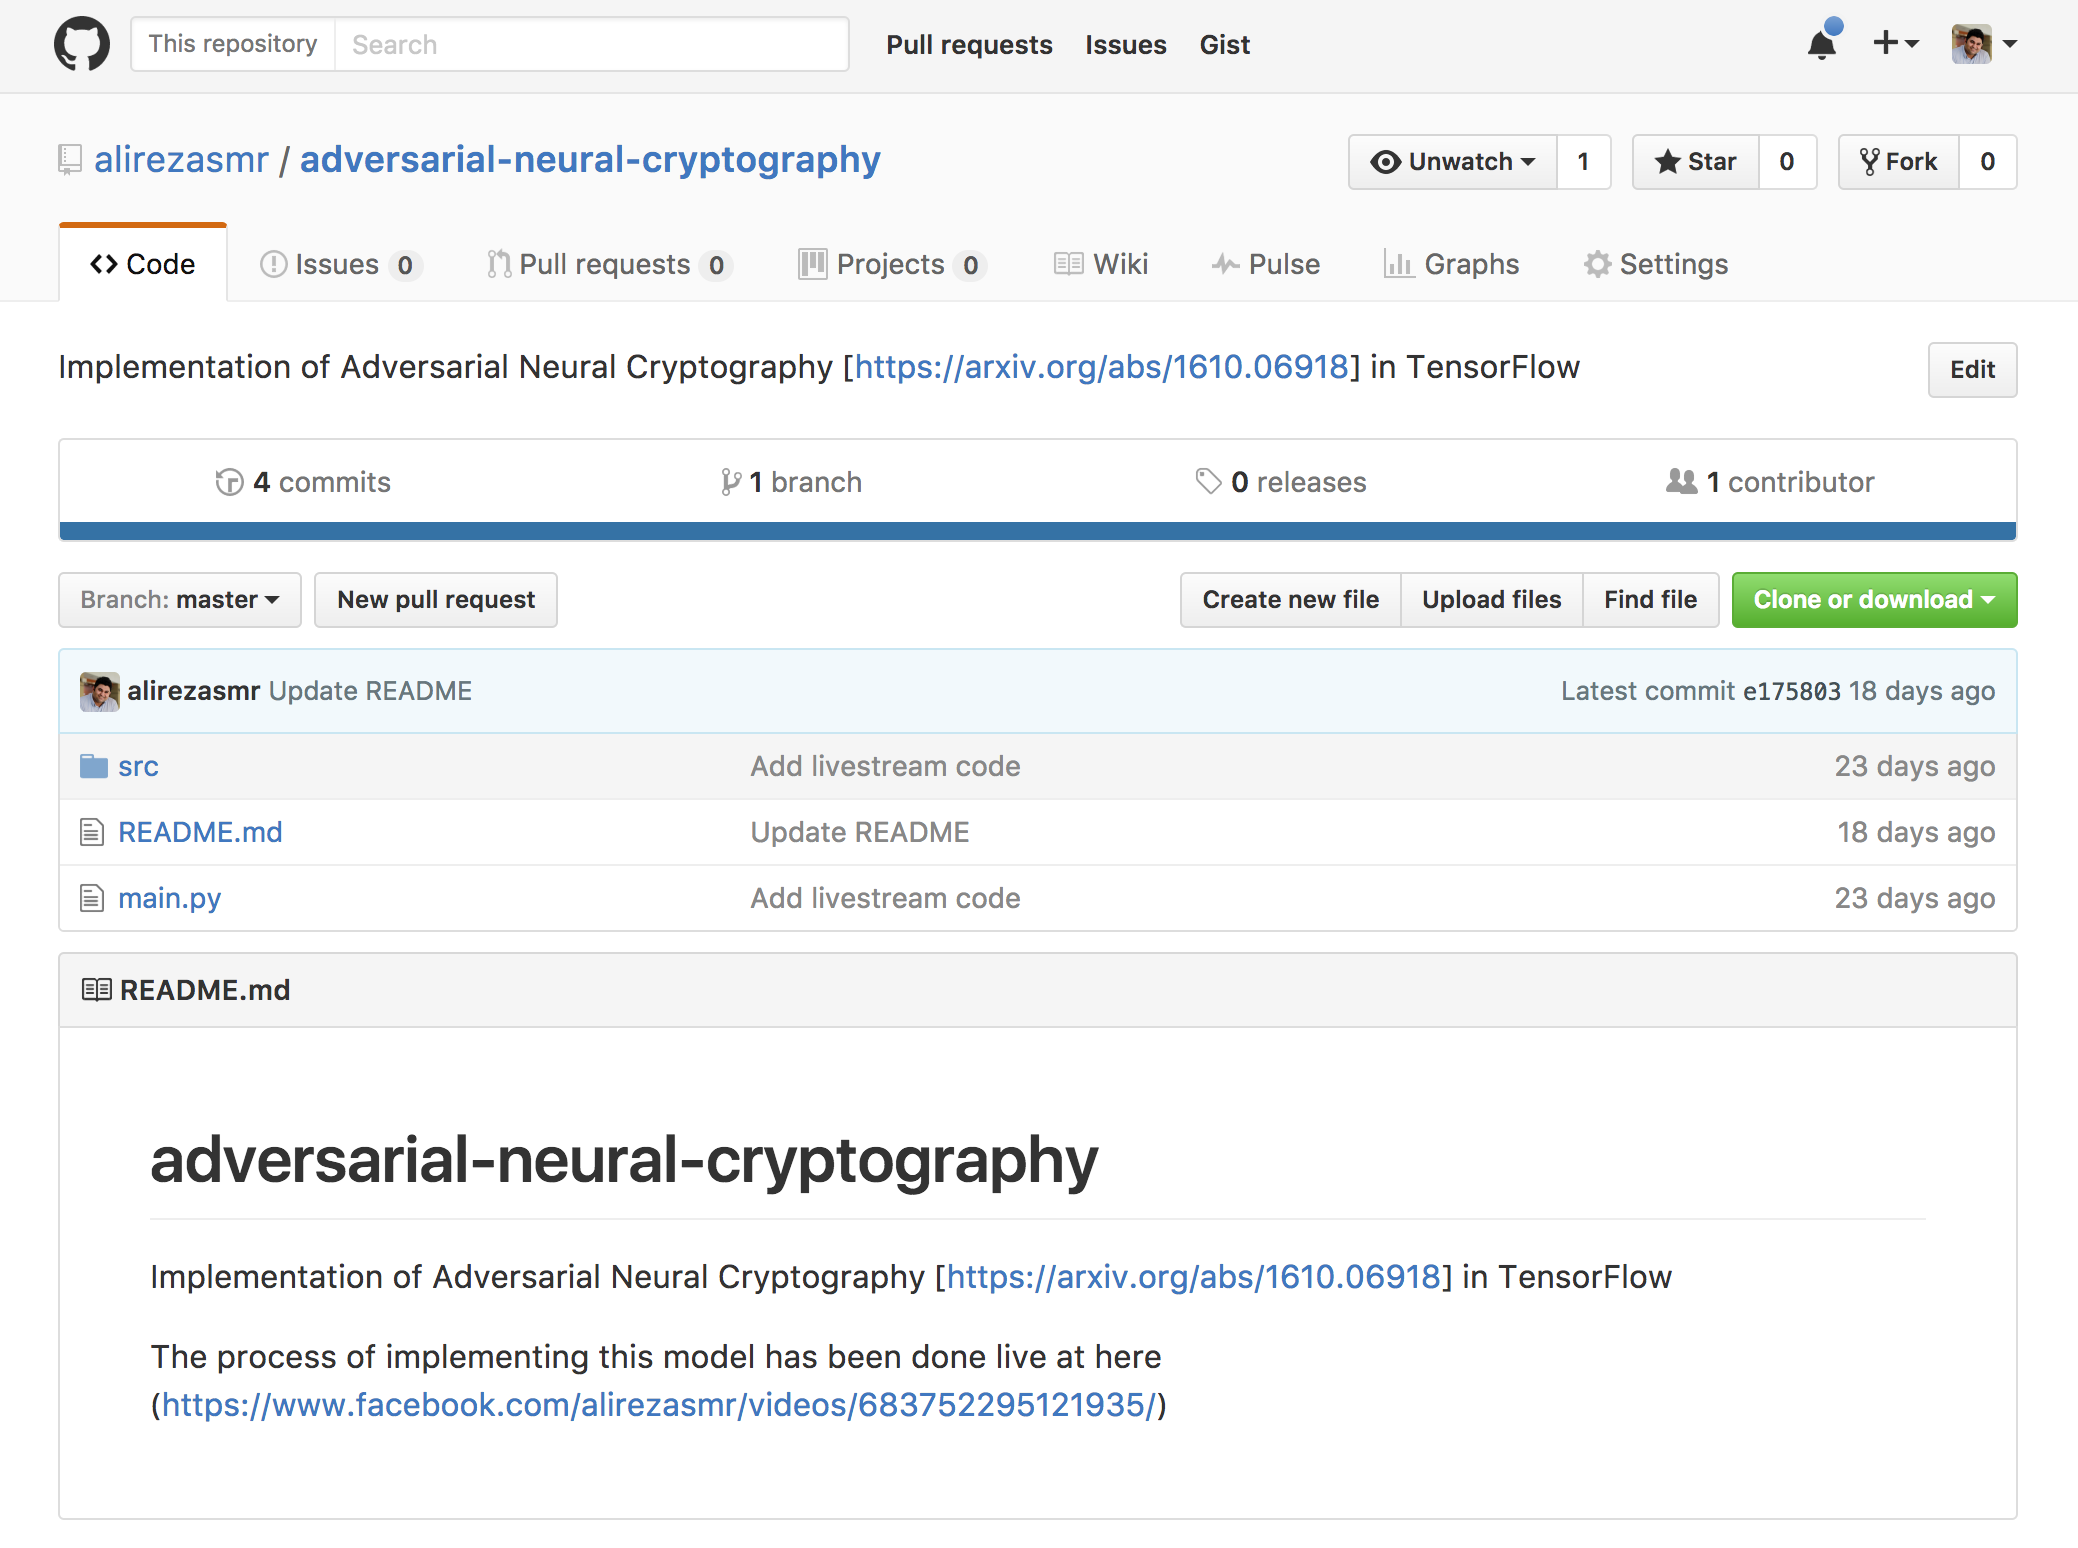

In [27]:
Image(filename='assets/github-project-page.png')

## Graphical user interfaces

There are also a number of graphical users interfaces for GIT. The available options vary a little bit from platform to platform:

http://git-scm.com/downloads/guis

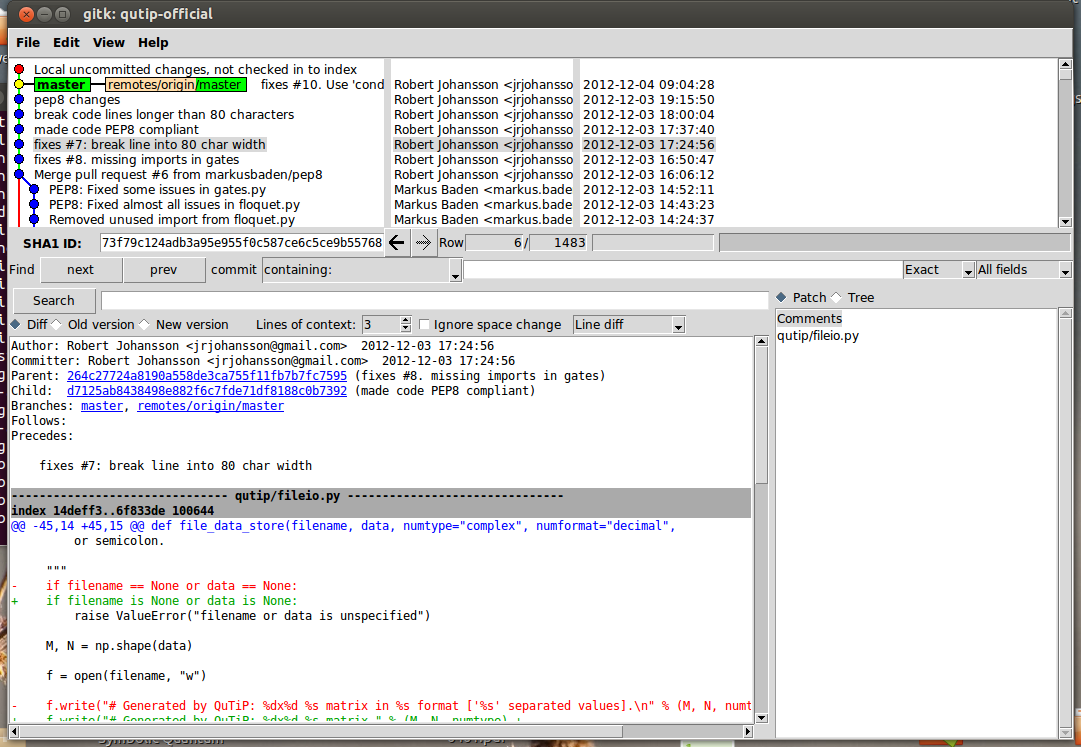

In [28]:
Image(filename='assets/gitk.png')

## Further reading

* http://git-scm.com/book
* http://www.vogella.com/articles/Git/article.html
* http://cheat.errtheblog.com/s/git